# Hydrophone
# Special Thanks to Jean Baptiste Joseph Fourier

Data from https://oceanobservatories.org/instrument-series/hydbba/

Install obspy

In [145]:
#two lines below work on google colab
#!pip install --upgrade seaborn==0.9.0
#!pip install obspy 

#In linux terminal this one below worked for me
#conda install -c conda-forge obspy

Import Packages

In [146]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

# Part 1

In [147]:
#Oregon shelf 
#no wind or rain (July 6th 2019)
dataurl0='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/06/OO-HYEA2--YDH-2019-07-06T17:51:47.083000.mseed'
#wind no rain (2/13/19)
dataurl1='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/13/OO-HYEA2--YDH-2019-02-13T03:35:00.000000.mseed'
#no wind rain (1/7/19)
dataurl2='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/07/OO-HYEA2--YDH-2019-01-07T17:40:00.000015.mseed'
#Wind and Rain (11/27/19)
dataurl3='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/11/27/OO-HYEA2--YDH-2019-11-27T07:17:18.225688.mseed'

In [148]:
#Oregon Offshore
#no wind or rain (1/13/19)
dataurl4='https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/13/OO-HYEA1--YDH-2019-01-13T22:35:00.000000.mseed'
#wind no rain (1/6/19)
dataurl5='https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T06:40:00.000015.mseed'
#no wind yes rain (2/24/19)    
dataurl6='https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/24/OO-HYEA1--YDH-2019-02-24T11:30:00.000000.mseed'    
#yes wind yes rain (1/1/19)
dataurl7='https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T03:40:00.000015.mseed' 

# Shelf No Wind No Rain

In [149]:
st = read(dataurl0)


In [150]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


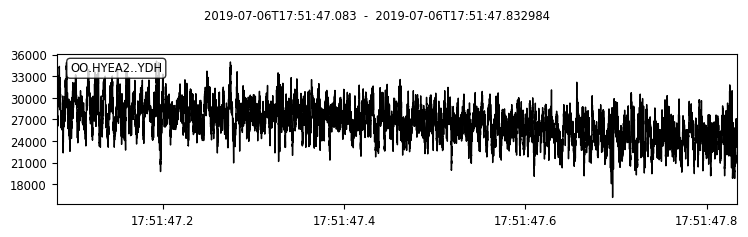

In [151]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

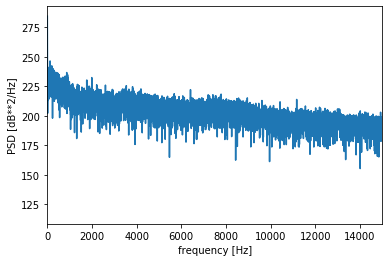

In [152]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+200
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Shelf Wind No Rain

In [153]:
st = read(dataurl1)
st[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-02-13T03:35:00.000000Z
         endtime: 2019-02-13T03:39:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9588, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 39272448})

In [154]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


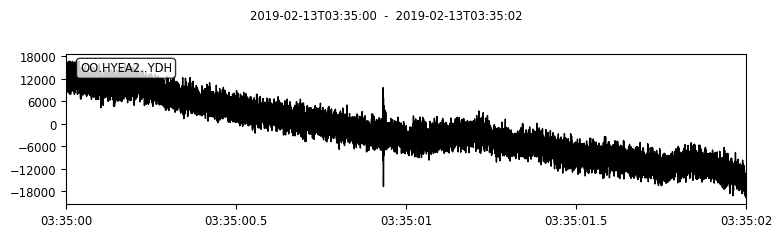

In [155]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

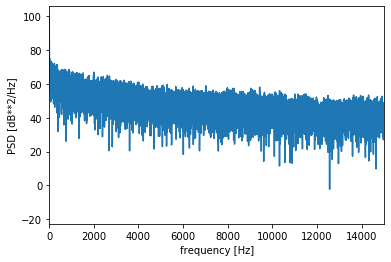

In [156]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Shelf Yes Rain No Wind

In [157]:
st = read(dataurl2)
st[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-01-07T17:40:00.000015Z
         endtime: 2019-01-07T17:45:00.000999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200064
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9540, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 39075840})

In [158]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


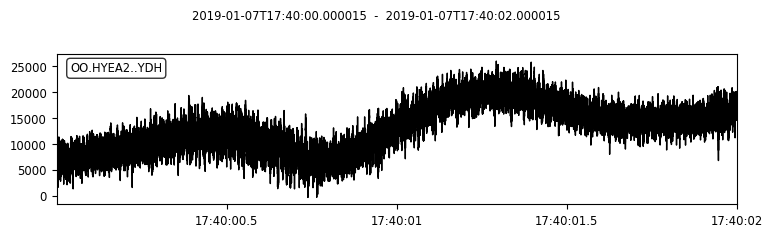

In [159]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

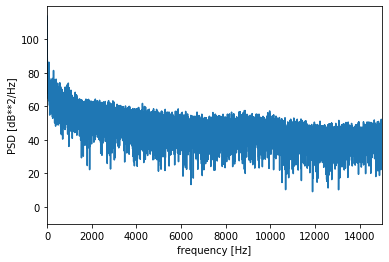

In [160]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Shelf Wind and Rain

In [161]:
st = read(dataurl3)
st[0].stats

         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2019-11-27T07:17:18.225688Z
         endtime: 2019-11-27T07:17:18.475672Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 16000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 36864})

In [162]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


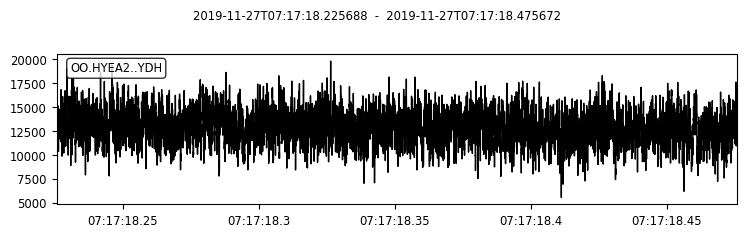

In [163]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

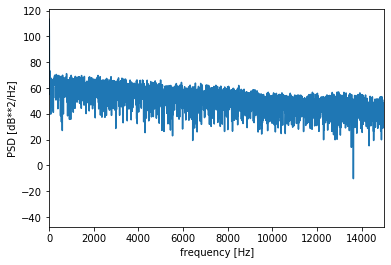

In [164]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Offshore

# Offshore no wind no rain

In [165]:
st = read(dataurl4)
st[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-01-13T22:35:00.000000Z
         endtime: 2019-01-13T22:39:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 8901, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 36458496})

In [166]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


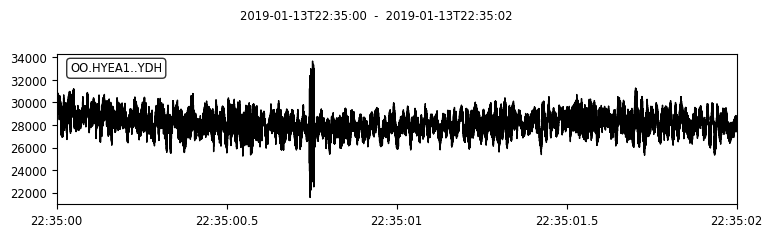

In [167]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

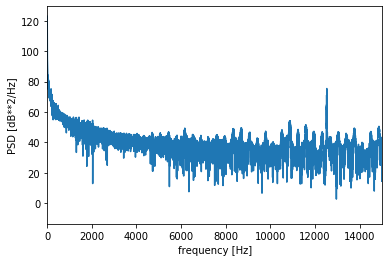

In [168]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Offshore Wind No Rain

In [169]:
st = read(dataurl5)
st[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-01-06T06:40:00.000015Z
         endtime: 2019-01-06T06:44:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9495, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38891520})

In [170]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


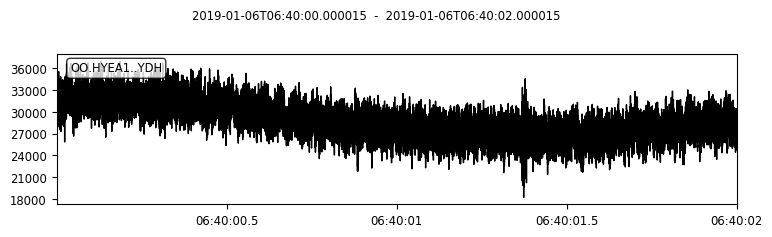

In [171]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

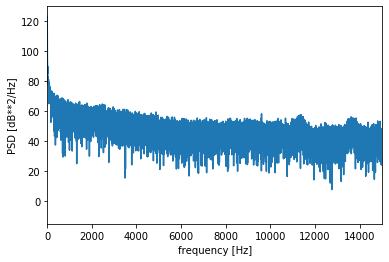

In [172]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Offshore no wind yes rain

In [173]:
st = read(dataurl6)
st[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-02-24T11:30:00.000000Z
         endtime: 2019-02-24T11:34:59.999984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9624, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 39419904})

In [174]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


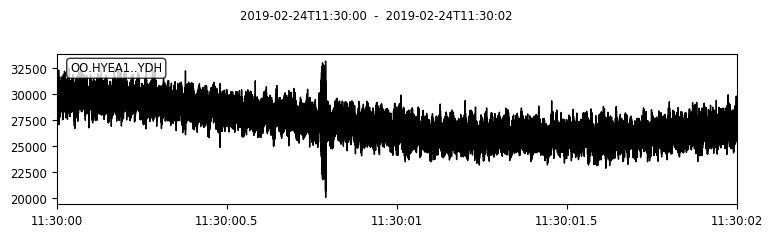

In [175]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

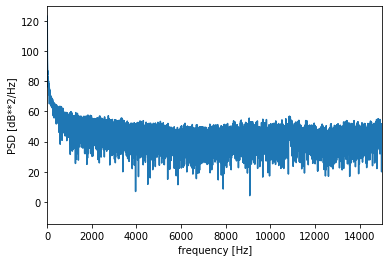

In [176]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Offshore Wind and Rain

In [177]:
st = read(dataurl7)
st[0].stats

         network: OO
         station: HYEA1
        location: 
         channel: YDH
       starttime: 2019-01-01T03:40:00.000015Z
         endtime: 2019-01-01T03:44:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9282, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 38019072})

In [178]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


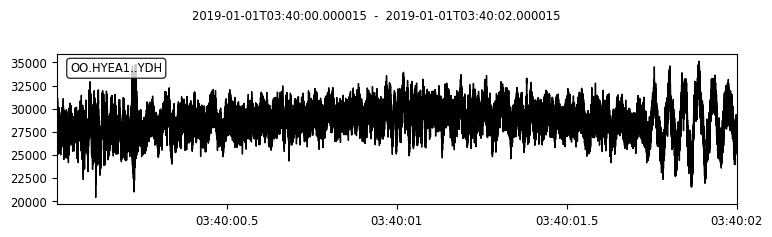

In [179]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)
sliced.plot()

(0, 15000)

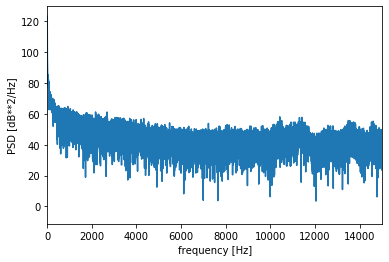

In [180]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Part 2

# Marine Mammal Vocalization

In [181]:
data_url_8 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:05:00.000000.mseed'
st = read(data_url_8)

4000


(0, 1200)

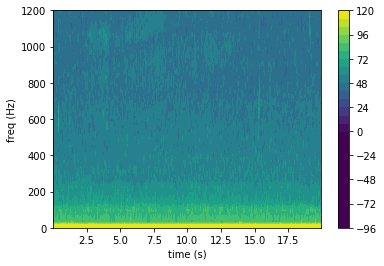

In [182]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 20
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,1200)



# Airguns

In [183]:
data_url_9 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
st = read(data_url_9)

4000


(0, 5000)

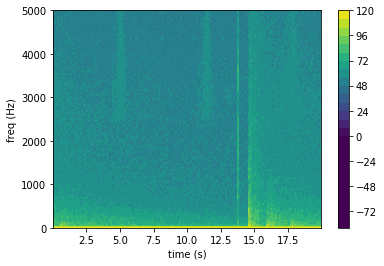

In [184]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 20
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)



# EARTHQUAKE

In [185]:
data_url_10 = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/16/OO-AXVM1--YDH-2019-08-16T15:25:00.000015.mseed'
st = read(data_url_10)

4000


(0, 150)

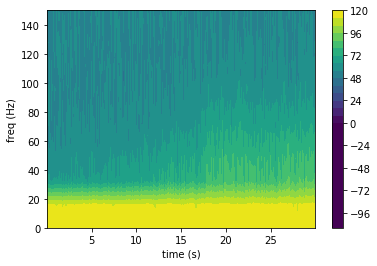

In [186]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 30
sliced = st.slice(t_start, t_end)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)
print(nfft)
per_lap = 0.90
nlap = int(nfft * float(per_lap))
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,150)
